# Titanic Disaster

Vamos a explorar el dataset de titanic


importa `matplotlib`, `numpy` y `pandas`

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd

fijate la ubicación del archivo

In [2]:
!ls -lh

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


carga el dataset

In [3]:
titanic_df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')

Explorá los métodos básicos (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fijate que hay missings en  `Cabin`. Elimina la columna

 [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [6]:
titanic_df.drop('Cabin', axis=1, inplace=True)

## Analisis por clase


Usa `groupby()` y crea un dataframe por clase contando la cantidad de tickets vendidos por clase  (1, 2 or 3)

In [7]:
pclass_df = titanic_df.groupby("Pclass").count()["PassengerId"].to_frame(name="count")
pclass_df

,count
Pclass,
1,216
2,184
3,491


Hace un gráfico de barras

<AxesSubplot:xlabel='Pclass'>

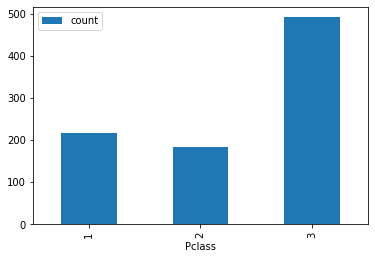

In [8]:
pclass_df.plot(kind="bar")

analicemos **survivors**.

Armar un barchart con la frecuencia de survivals por clase

In [19]:
titanic_df[["Pclass","Survived"]].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [23]:
titanic_df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass'>

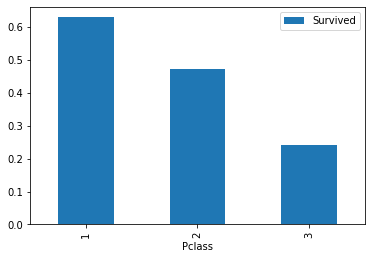

In [21]:
titanic_df[["Pclass","Survived"]].groupby('Pclass').mean().plot(kind='bar')

### Analisis por genero

fijate la columna de Sex

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [10]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

Hace un barchart para ver quienes sobreviven más según genero

<AxesSubplot:xlabel='Sex'>

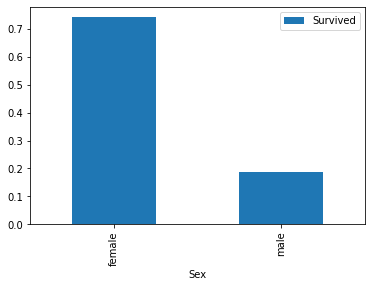

In [11]:
titanic_df[['Survived', 'Sex']].groupby('Sex').mean().plot(kind='bar')

## Niños

crea un dataset para edad menor a 17 años

In [12]:
children_df = titanic_df[titanic_df['Age'] <= 17]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


¿cuantos chicos había en el titanic?

In [13]:
children_df.shape[0]

113

¿Cuantos sorevivieron?

In [14]:
children_df['Survived'].sum()

61

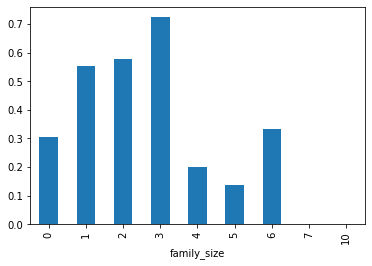

In [15]:
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.groupby('family_size').mean()['Survived'].plot(kind='bar');

<AxesSubplot:xlabel='Title'>

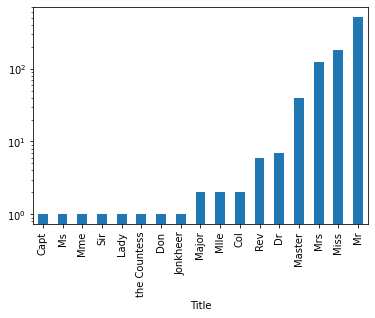

In [16]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df.groupby('Title').count()['PassengerId'].sort_values().plot(kind='bar', logy=True)

<AxesSubplot:xlabel='Title'>

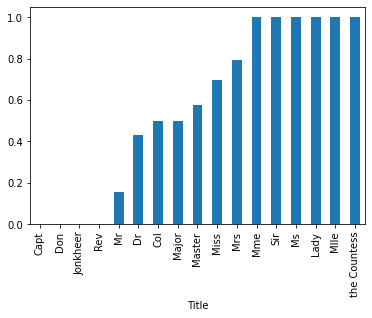

In [17]:
titanic_df.groupby('Title').mean()['Survived'].sort_values().plot(kind='bar')

In [24]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,Mr
